In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import numpy as np

brex = pd.read_csv('Brexit1.csv', sep=',', index_col = 0)
print(brex)

                           username  number_of_followers           created_at  \
tweet_id                                                                        
931889510165700608    2351onthelist                 4656  2017-11-18 14:19:07   
931889506978074624      Col_Sandurz                   50  2017-11-18 14:19:06   
931889490481655815           zlando                27816  2017-11-18 14:19:02   
931889475822555136    clarecorbould                 1524  2017-11-18 14:18:59   
931889428385222656      MPP76420472                  523  2017-11-18 14:18:48   
931889402925678593      shaistaAziz                 8194  2017-11-18 14:18:41   
931889393828319232         roshbeth                 1700  2017-11-18 14:18:39   
931889388631527425        hqbinders                  240  2017-11-18 14:18:38   
931889374760980481        ChantalBB                  636  2017-11-18 14:18:35   
931889371527213056    FESMontemaggi                 1492  2017-11-18 14:18:34   
931889358755586048        an

In [162]:
round(brex[['number_of_followers', 'likes', 'retweets']].describe(),2)

,number_of_followers,likes,retweets
count,1000.00,1000.00,1000.00
mean,4538.85,0.51,66.42
std,55626.61,7.66,172.12
min,1.00,0.00,0.00
25%,235.00,0.00,0.00
50%,719.00,0.00,5.00
75%,1773.50,0.00,118.00
max,1712007.00,237.00,2117.00


In [112]:
brex.corr()

,number_of_followers,likes,retweets
number_of_followers,1.000000,0.038884,-0.014079
likes,0.038884,1.000000,-0.001054
retweets,-0.014079,-0.001054,1.000000


In [129]:
brex[['source','user_location']].describe()

,source,user_location
count,1000,734
unique,39,412
top,Twitter for Android,London
freq,279,66


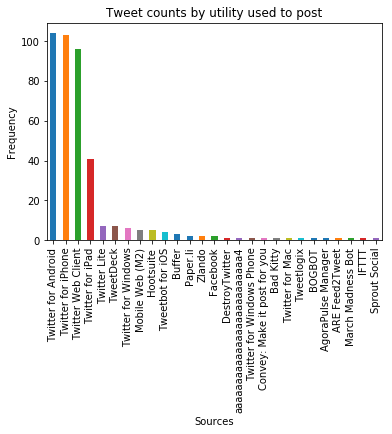

In [107]:
brex['source'].value_counts().plot(kind='bar')
plt.ylabel('Frequency')
plt.xlabel('Sources')
plt.title('Tweet counts by utility used to post')

plt.show()


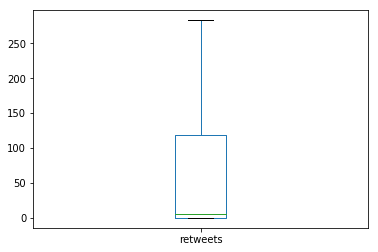

In [118]:
brex['retweets'].plot(kind = 'box',showfliers=False)

plt.show()